In [1]:
# Importing the dependencies

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
file = 'Resources/database.csv'
df = pd.read_csv(file)
df.head()

C:\Users\Kevin\anaconda3\envs\PythonData\lib\site-packages\IPython\core\interactiveshell.py:3072: DtypeWarning: Columns (9,12,15,17) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,Record ID,Incident Year,Incident Month,Incident Day,Operator ID,Operator,Aircraft,Aircraft Type,Aircraft Make,Aircraft Model,...,Fuselage Strike,Fuselage Damage,Landing Gear Strike,Landing Gear Damage,Tail Strike,Tail Damage,Lights Strike,Lights Damage,Other Strike,Other Damage
0,127128,1990,1,1,DAL,DELTA AIR LINES,B-757-200,A,148,26,...,0,0,0,0,1,1,0,0,0,0
1,129779,1990,1,1,HAL,HAWAIIAN AIR,DC-9,A,583,90,...,0,0,0,0,0,0,0,0,1,0
2,129780,1990,1,2,UNK,UNKNOWN,UNKNOWN,NaN,NaN,NaN,...,0,0,0,0,0,0,0,0,0,0
3,2258,1990,1,3,MIL,MILITARY,A-10A,A,345,NaN,...,0,0,0,0,0,0,0,0,0,0
4,2257,1990,1,3,MIL,MILITARY,F-16,A,561,NaN,...,0,0,0,0,0,0,0,0,0,0


In [3]:
df = df[['Record ID','Species ID','Species Name','Species Quantity',
        'Fatalities','Injuries',]]
df.head()

,Record ID,Species ID,Species Name,Species Quantity,Fatalities,Injuries
0,127128,NE1,GULL,1,NaN,NaN
1,129779,ZZ201,HOUSE SPARROW,1,NaN,NaN
2,129780,R1101,BARN OWL,1,NaN,NaN
3,2258,UNKBM,UNKNOWN MEDIUM BIRD,1,NaN,NaN
4,2257,ZX,FINCH,1,NaN,NaN


In [4]:
df['Fatalities'].fillna(0,inplace = True)
df['Injuries'].fillna(0,inplace = True)

In [5]:
df['Species Name'].unique()

array(['GULL', 'HOUSE SPARROW', 'BARN OWL', 'UNKNOWN MEDIUM BIRD',
       'FINCH', 'MUNIAS', 'PACIFIC GOLDEN-PLOVER', 'SPOTTED DOVE',
       'WHITE-TAILED DEER', 'HORNED LARK', 'ROCK PIGEON',
       'WESTERN MEADOWLARK', 'SPARROW', 'GEESE', 'UNKNOWN BIRD',
       'TURKEY VULTURE', 'HAWAIIAN DUCK', 'HERRING GULL', 'SANDPIPER',
       'ZEBRA DOVE', 'MALLARD', 'SHORT-EARED OWL', 'UNKNOWN LARGE BIRD',
       'DUCKS, GEESE, SWANS', 'HAWK', 'LAUGHING GULL', 'RING-BILLED GULL',
       'MOURNING DOVE', 'DOUBLE-CRESTED CORMORANT',
       'THRASHERS, MOCKINGBIRDS, CATBIRDS', 'EUROPEAN STARLING', 'MERLIN',
       'WESTERN GULL', 'MULE DEER', 'CANADA GOOSE', 'UNKNOWN SMALL BIRD',
       'RED BAT', 'CATTLE EGRET', 'HERONS, EGRETS, BITTERNS', 'OSPREY',
       "TOWNSEND'S SHEARWATER", 'BLACKBIRD', 'BLACK VULTURE', 'SHOREBIRD',
       'SNOW BUNTING', 'DOVE', 'AMERICAN ROBIN', 'BROWN-HEADED COWBIRD',
       "FRANKLIN'S GULL", 'ROSE-BREASTED GROSBEAK', 'DUCK', 'TERNS',
       'STARLINGS', 'COMMON NIGHTH

In [6]:
unknown_df = df.replace(
{'UNKNOWN MEDIUM BIRD': "UNKNOWN BIRD",'UNKNOWN SMALL BIRD':'UNKNOWN BIRD',
 'UNKNOWN TERRESTIAL BIRD':'UNKNOWN BIRD','UNKNOWN LARGE BIRD':'UNKNOWN BIRD',
'UNKNOWN BIRD OR BAT': 'UNKNOWN BIRD'}
)
not_birds = ['MULE DEER','COYOTE','DEER','DOMESTIC DOG','UNKNOWN TERRESTIAL MAMMAL','RED FOX','RABBIT','DOMESTIC CAT',
            'CATTLE','WAPITI (ELK)','FOXES','TURTLE','RACCOON','AMERICAN ALLIGATOR','STRIPED SKUNK',
            'MUSKRAT','FLORIDA SOFT SHELL TURTLE','TUFTED TITMOUSE','ARMADILLO','HORSE','CHICKEN TURTLE',
            'COMMON SNAPPING TURTLE','SWINE (PIGS)','COMMON GRAY FOX','NORTH AMERICAN PORCUPINE',
            'BLACK-TAILED JACKRABBIT','BLACK-TAILED PRAIRIE DOG','GREEN IGUANA','DIAMONDBACK TERRAPIN',
             "GUNNISON'S PRAIRIE DOG", 'PAINTED TURTLE', 'EASTERN MUD TURTLE','SKUNK','KIT FOX','DESERT COTTONTAIL',
            'NORTH AMERICAN BEAVER','GOPHER TORTOISE','WHITE-TAILED PRAIRIE DOG','ALLIGATOR SNAPPING TURTLE',
            'ANTELOPE JACKRABBIT', 'FOX SQUIRREL','CATS','BULL SNAKE','SNAKES','NORTHERN WATER SNAKE','AMERICAN BLACK BEAR',
            'EASTERN DIAMONDBACK RATTLESNAKE', 'PRAIRIE DOGS','STRIPED MUD TURTLE','VIRGINIA OPOSSUM','EASTERN BOX TURTLE','MINK',
            'BURRO','LAGOMORPHS (RABBITS, HARES)','WATER MOCCASIN',]
# Contains nan value

# Birds but need new classification
#'RAPTORS: HAWKS, EAGLES, VULTURES, KITES, OSPREY, F','KITES, EAGLES, HAWKS'
unknown_df = unknown_df.replace(not_birds, 'OTHER ANIMALS')
unknown_df = unknown_df.replace({
    'RAPTORS: HAWKS, EAGLES, VULTURES, KITES, OSPREY, F':'HAWKS, EAGLES, VULTURES, KITES, OSPREY',
    'KITES, EAGLES, HAWKS' : 'HAWKS, EAGLES, VULTURES, KITES, OSPREY'})
unknown_df.dropna(subset = ["Species Name"])

unknown_bird_df = unknown_df.loc[(unknown_df['Species Name'] == 'UNKNOWN BIRD')]
other_df = unknown_df.loc[(unknown_df['Species Name']== 'OTHER ANIMALS')]
known_df = unknown_df.loc[(unknown_df['Species Name']!= 'OTHER ANIMALS')&(unknown_df['Species Name']!= 'UNKNOWN BIRD')]

print(len(unknown_bird_df))
print(len(other_df))
print(len(known_df))

80771
2417
90916


In [7]:
summ_inc = pd.DataFrame([len(unknown_bird_df),len(known_df),len(other_df)],['Unknown','Known','Other Animals'])
summ_inc.rename(columns = {0: 'Count1'})

,Count1
Unknown,80771
Known,90916
Other Animals,2417


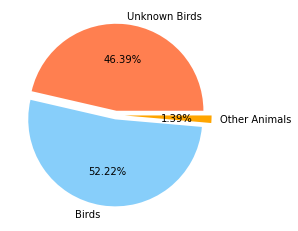

In [55]:
labels = ['Unknown Birds','Birds','Other Animals']
sizes = summ_inc[0]
colors = ['coral','lightskyblue','orange']
explode = (0.05,0.05,0.1)

plt.pie(sizes,explode = explode, labels = labels, colors = colors, autopct = '%.2f%%')
plt.savefig('output/birds_pie')
plt.show()

In [10]:
unknown_df['Species Name'].unique()

array(['GULL', 'HOUSE SPARROW', 'BARN OWL', 'UNKNOWN BIRD', 'FINCH',
       'MUNIAS', 'PACIFIC GOLDEN-PLOVER', 'SPOTTED DOVE',
       'WHITE-TAILED DEER', 'HORNED LARK', 'ROCK PIGEON',
       'WESTERN MEADOWLARK', 'SPARROW', 'GEESE', 'TURKEY VULTURE',
       'HAWAIIAN DUCK', 'HERRING GULL', 'SANDPIPER', 'ZEBRA DOVE',
       'MALLARD', 'SHORT-EARED OWL', 'DUCKS, GEESE, SWANS', 'HAWK',
       'LAUGHING GULL', 'RING-BILLED GULL', 'MOURNING DOVE',
       'DOUBLE-CRESTED CORMORANT', 'THRASHERS, MOCKINGBIRDS, CATBIRDS',
       'EUROPEAN STARLING', 'MERLIN', 'WESTERN GULL', 'OTHER ANIMALS',
       'CANADA GOOSE', 'RED BAT', 'CATTLE EGRET',
       'HERONS, EGRETS, BITTERNS', 'OSPREY', "TOWNSEND'S SHEARWATER",
       'BLACKBIRD', 'BLACK VULTURE', 'SHOREBIRD', 'SNOW BUNTING', 'DOVE',
       'AMERICAN ROBIN', 'BROWN-HEADED COWBIRD', "FRANKLIN'S GULL",
       'ROSE-BREASTED GROSBEAK', 'DUCK', 'TERNS', 'STARLINGS',
       'COMMON NIGHTHAWK', 'AMERICAN CROW', 'OWLS', "WILSON'S SNIPE",
       'CROW',

In [26]:
bird_group = known_df.groupby('Species Name')['Record ID'].count().sort_values(ascending = False)
bird_clean = bird_group.nlargest(10)
bird_clean

Species Name
MOURNING DOVE        7653
GULL                 6580
KILLDEER             4562
AMERICAN KESTREL     4476
BARN SWALLOW         4215
HORNED LARK          3952
EUROPEAN STARLING    3915
SPARROW              3152
ROCK PIGEON          2893
RED-TAILED HAWK      2254
Name: Record ID, dtype: int64

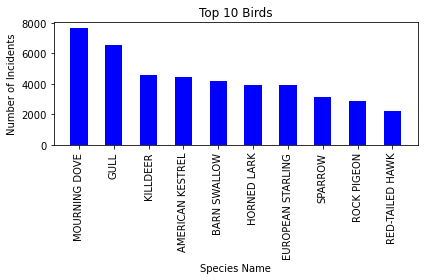

In [56]:
bird_names = ['MOURNING DOVE','GULL','KILLDEER','AMERICAN KESTREL','BARN SWALLOW','HORNED LARK',
              'EUROPEAN STARLING','SPARROW','ROCK PIGEON','RED-TAILED HAWK']
x_axis = np.arange(0,len(bird_clean))
plt.bar(x_axis, bird_clean , width = .5, color = 'blue', alpha = 1 ,align = 'center')
tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, bird_names,rotation = 'vertical')

plt.figsize = (10,8)
plt.xlabel('Species Name')
plt.ylabel('Number of Incidents')
plt.title('Top 10 Birds')
plt.tight_layout()

plt.savefig('output/birds_bar')
plt.show()

In [39]:
total_birds_df = unknown_df.loc[(unknown_df['Species Name'] != 'OTHER ANIMALS')]

In [40]:
quantity = total_birds_df.groupby('Species Quantity')['Species ID'].count().sort_values(ascending = False)
quantity

Species Quantity
1           144284
2-10         21812
11-100        1166
Over 100        46
Name: Species ID, dtype: int64

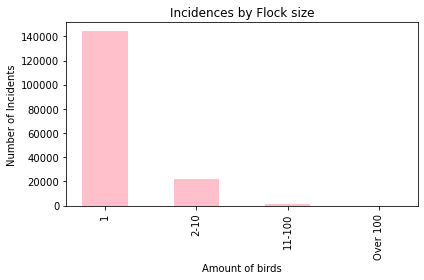

In [57]:
flock_type = ['1','2-10','11-100','Over 100']
x_axis = np.arange(0,len(quantity))
plt.bar(x_axis, quantity , width = .5, color = 'pink', alpha = 1 ,align = 'center')
tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, flock_type ,rotation = 'vertical')

plt.figsize = (10,8)
plt.xlabel('Amount of birds')
plt.ylabel('Number of Incidents')
plt.title('Incidences by Flock size')
plt.tight_layout()

plt.savefig('output/all_inc_bar')
plt.show()

In [42]:
quantity2 = known_df.groupby('Species Quantity')['Species ID'].count().sort_values(ascending = False)
quantity2

Species Quantity
1           73640
2-10        13821
11-100        919
Over 100       36
Name: Species ID, dtype: int64

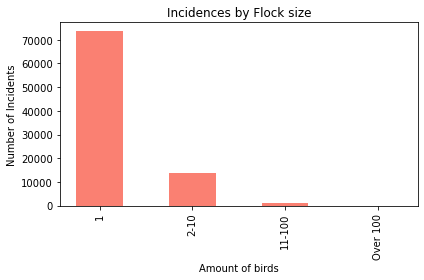

In [58]:
flock_type = ['1','2-10','11-100','Over 100']
x_axis = np.arange(0,len(quantity2))
plt.bar(x_axis, quantity2 , width = .5, color = 'salmon', alpha = 1 ,align = 'center')
tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, flock_type ,rotation = 'vertical')

plt.figsize = (10,8)
plt.xlabel('Amount of birds')
plt.ylabel('Number of Incidents')
plt.title('Incidences by Flock size')
plt.tight_layout()

plt.savefig('output/known_inc_bar')
plt.show()

In [50]:
clean_bird_df = known_df.loc[df['Species Name'].isin(bird_names)]
clean_bird_quant = clean_bird_df.groupby(['Species Name','Species Quantity'])['Record ID'].count()
clean_bird_quant

Species Name       Species Quantity
AMERICAN KESTREL   1                   4279
                   11-100                 2
                   2-10                 187
BARN SWALLOW       1                   3345
                   11-100                22
                   2-10                 745
EUROPEAN STARLING  1                   2555
                   11-100               239
                   2-10                1087
                   Over 100              19
GULL               1                   4949
                   11-100                75
                   2-10                1534
                   Over 100               5
HORNED LARK        1                   3074
                   11-100                22
                   2-10                 595
KILLDEER           1                   4004
                   11-100                15
                   2-10                 421
MOURNING DOVE      1                   6335
                   11-100               

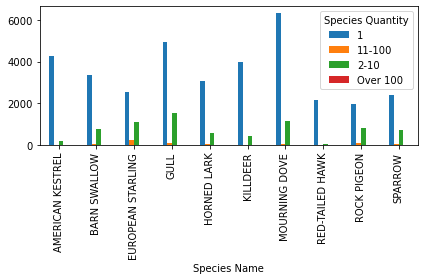

In [60]:
bar_attempt = clean_bird_df.groupby(['Species Name','Species Quantity'])['Record ID'].count().unstack('Species Quantity').plot.bar()
plt.tight_layout()
plt.savefig('output/Inc_by_quant')
plt.show()